In [1]:
%%capture
import sys
!{sys.executable} -m pip install SimpleITK==2.2.1 cassandra-driver==3.27.0 diskcache==4.1.0 \
    ipympl==0.9.3 ipyvolume==0.6.1

In [2]:
import ipyvolume as ipv
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage.morphology
from p2ch10.dsets import getCandidateInfoList, getCt, LunaDataset
from p2ch10.vis import findPositiveSamples, showCandidate

In [3]:
candidateInfo_list = getCandidateInfoList(requireOnDisk_bool=True)
positiveInfo_list = [x for x in candidateInfo_list if x[0]]
diameter_list = [x[1] for x in positiveInfo_list]

In [4]:
print(len(positiveInfo_list))
print(positiveInfo_list[0])

1351
CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))


In [5]:
for i in range(0, len(diameter_list), 100):
    print('{:4}  {:4.1f} mm'.format(i, diameter_list[i]))

   0  32.3 mm
 100  17.7 mm
 200  13.0 mm
 300  10.0 mm
 400   8.2 mm
 500   7.0 mm
 600   6.3 mm
 700   5.7 mm
 800   5.1 mm
 900   4.7 mm
1000   4.0 mm
1100   0.0 mm
1200   0.0 mm
1300   0.0 mm


In [6]:
for candidateInfo_tup in positiveInfo_list[:3]:
    print(candidateInfo_tup)
for candidateInfo_tup in positiveInfo_list[-3:]:
    print(candidateInfo_tup)
    
for candidateInfo_tup in positiveInfo_list:
    if candidateInfo_tup.series_uid.endswith('565'):
        print(candidateInfo_tup)

CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(47.90350511, 37.60442008, -99.93417567))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(44.19, 37.79, -107.01))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=0.0, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', center_xyz=(8.8, 174.74, -401.87))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=0.0, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', center_xyz=(5.99, 171.94, -398.37))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=0.0, series_uid='1.3.6.1.4.1.14519.5.

In [7]:
np.histogram(diameter_list)

(array([323, 466, 248, 111,  71,  57,  37,  29,   5,   4]),
 array([ 0.        ,  3.22700302,  6.45400605,  9.68100907, 12.9080121 ,
        16.13501512, 19.36201815, 22.58902117, 25.8160242 , 29.04302722,
        32.27003025]))

Text(0.5, 1.0, 'Histogram of nodule diameters')

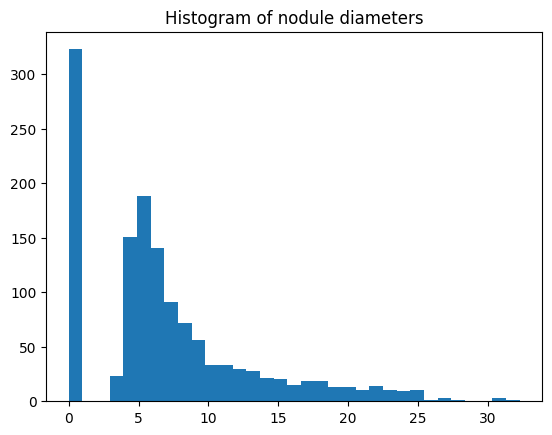

In [8]:
%matplotlib inline
_ = plt.hist(diameter_list, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of nodule diameters")

In [9]:
positiveSample_list = findPositiveSamples(start_ndx=0, limit=11)

2023-05-18 03:20:23,347 INFO     pid:78 p2ch10.dsets:170:__init__ <p2ch10.dsets.LunaDataset object at 0x7f4ca988ce50>: 551065 training samples


In [10]:
series_uid = positiveSample_list[0][2]
series_uid

'1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886'

In [11]:
candidateInfo_list[0]

CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))

2023-05-18 03:20:23,823 INFO     pid:78 p2ch10.dsets:170:__init__ <p2ch10.dsets.LunaDataset object at 0x7f4ca9c91c70>: 1061 training samples


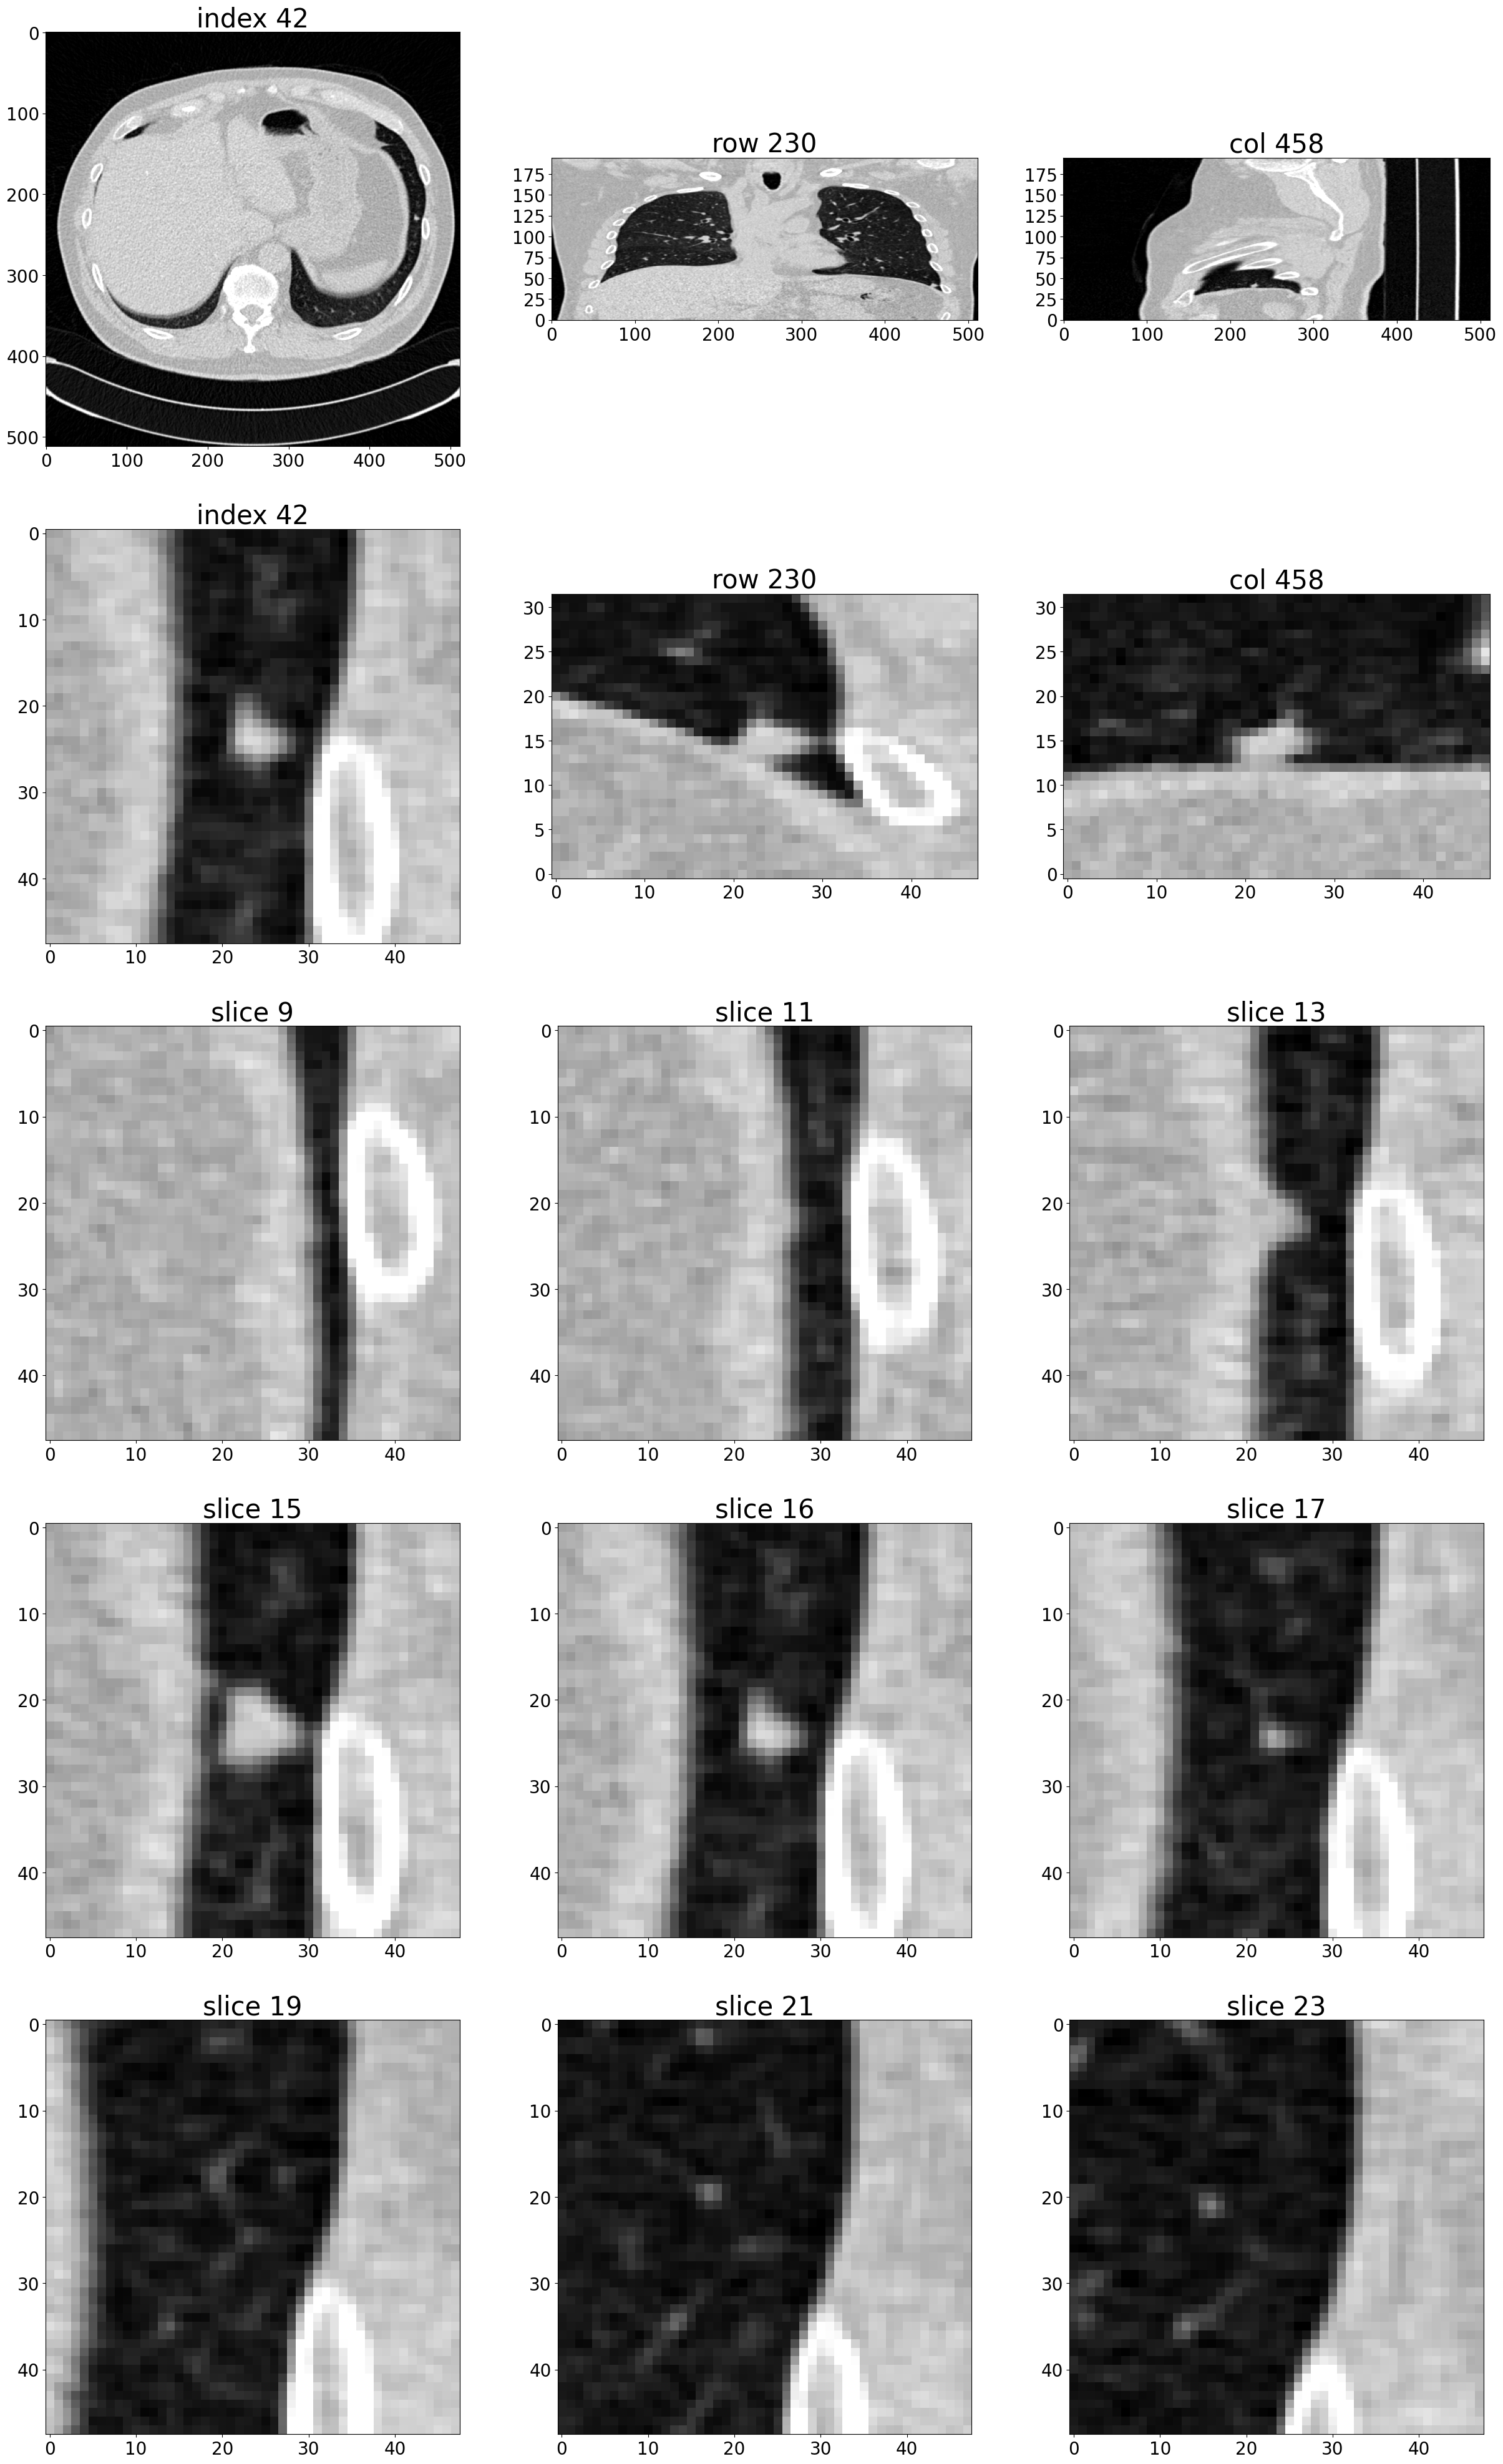

1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565 0 False [0]


In [12]:
# %matplotlib inline
series_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565'
showCandidate(series_uid)

2023-05-18 03:20:52,880 INFO     pid:78 p2ch10.dsets:170:__init__ <p2ch10.dsets.LunaDataset object at 0x7f4ca7fe6520>: 993 training samples


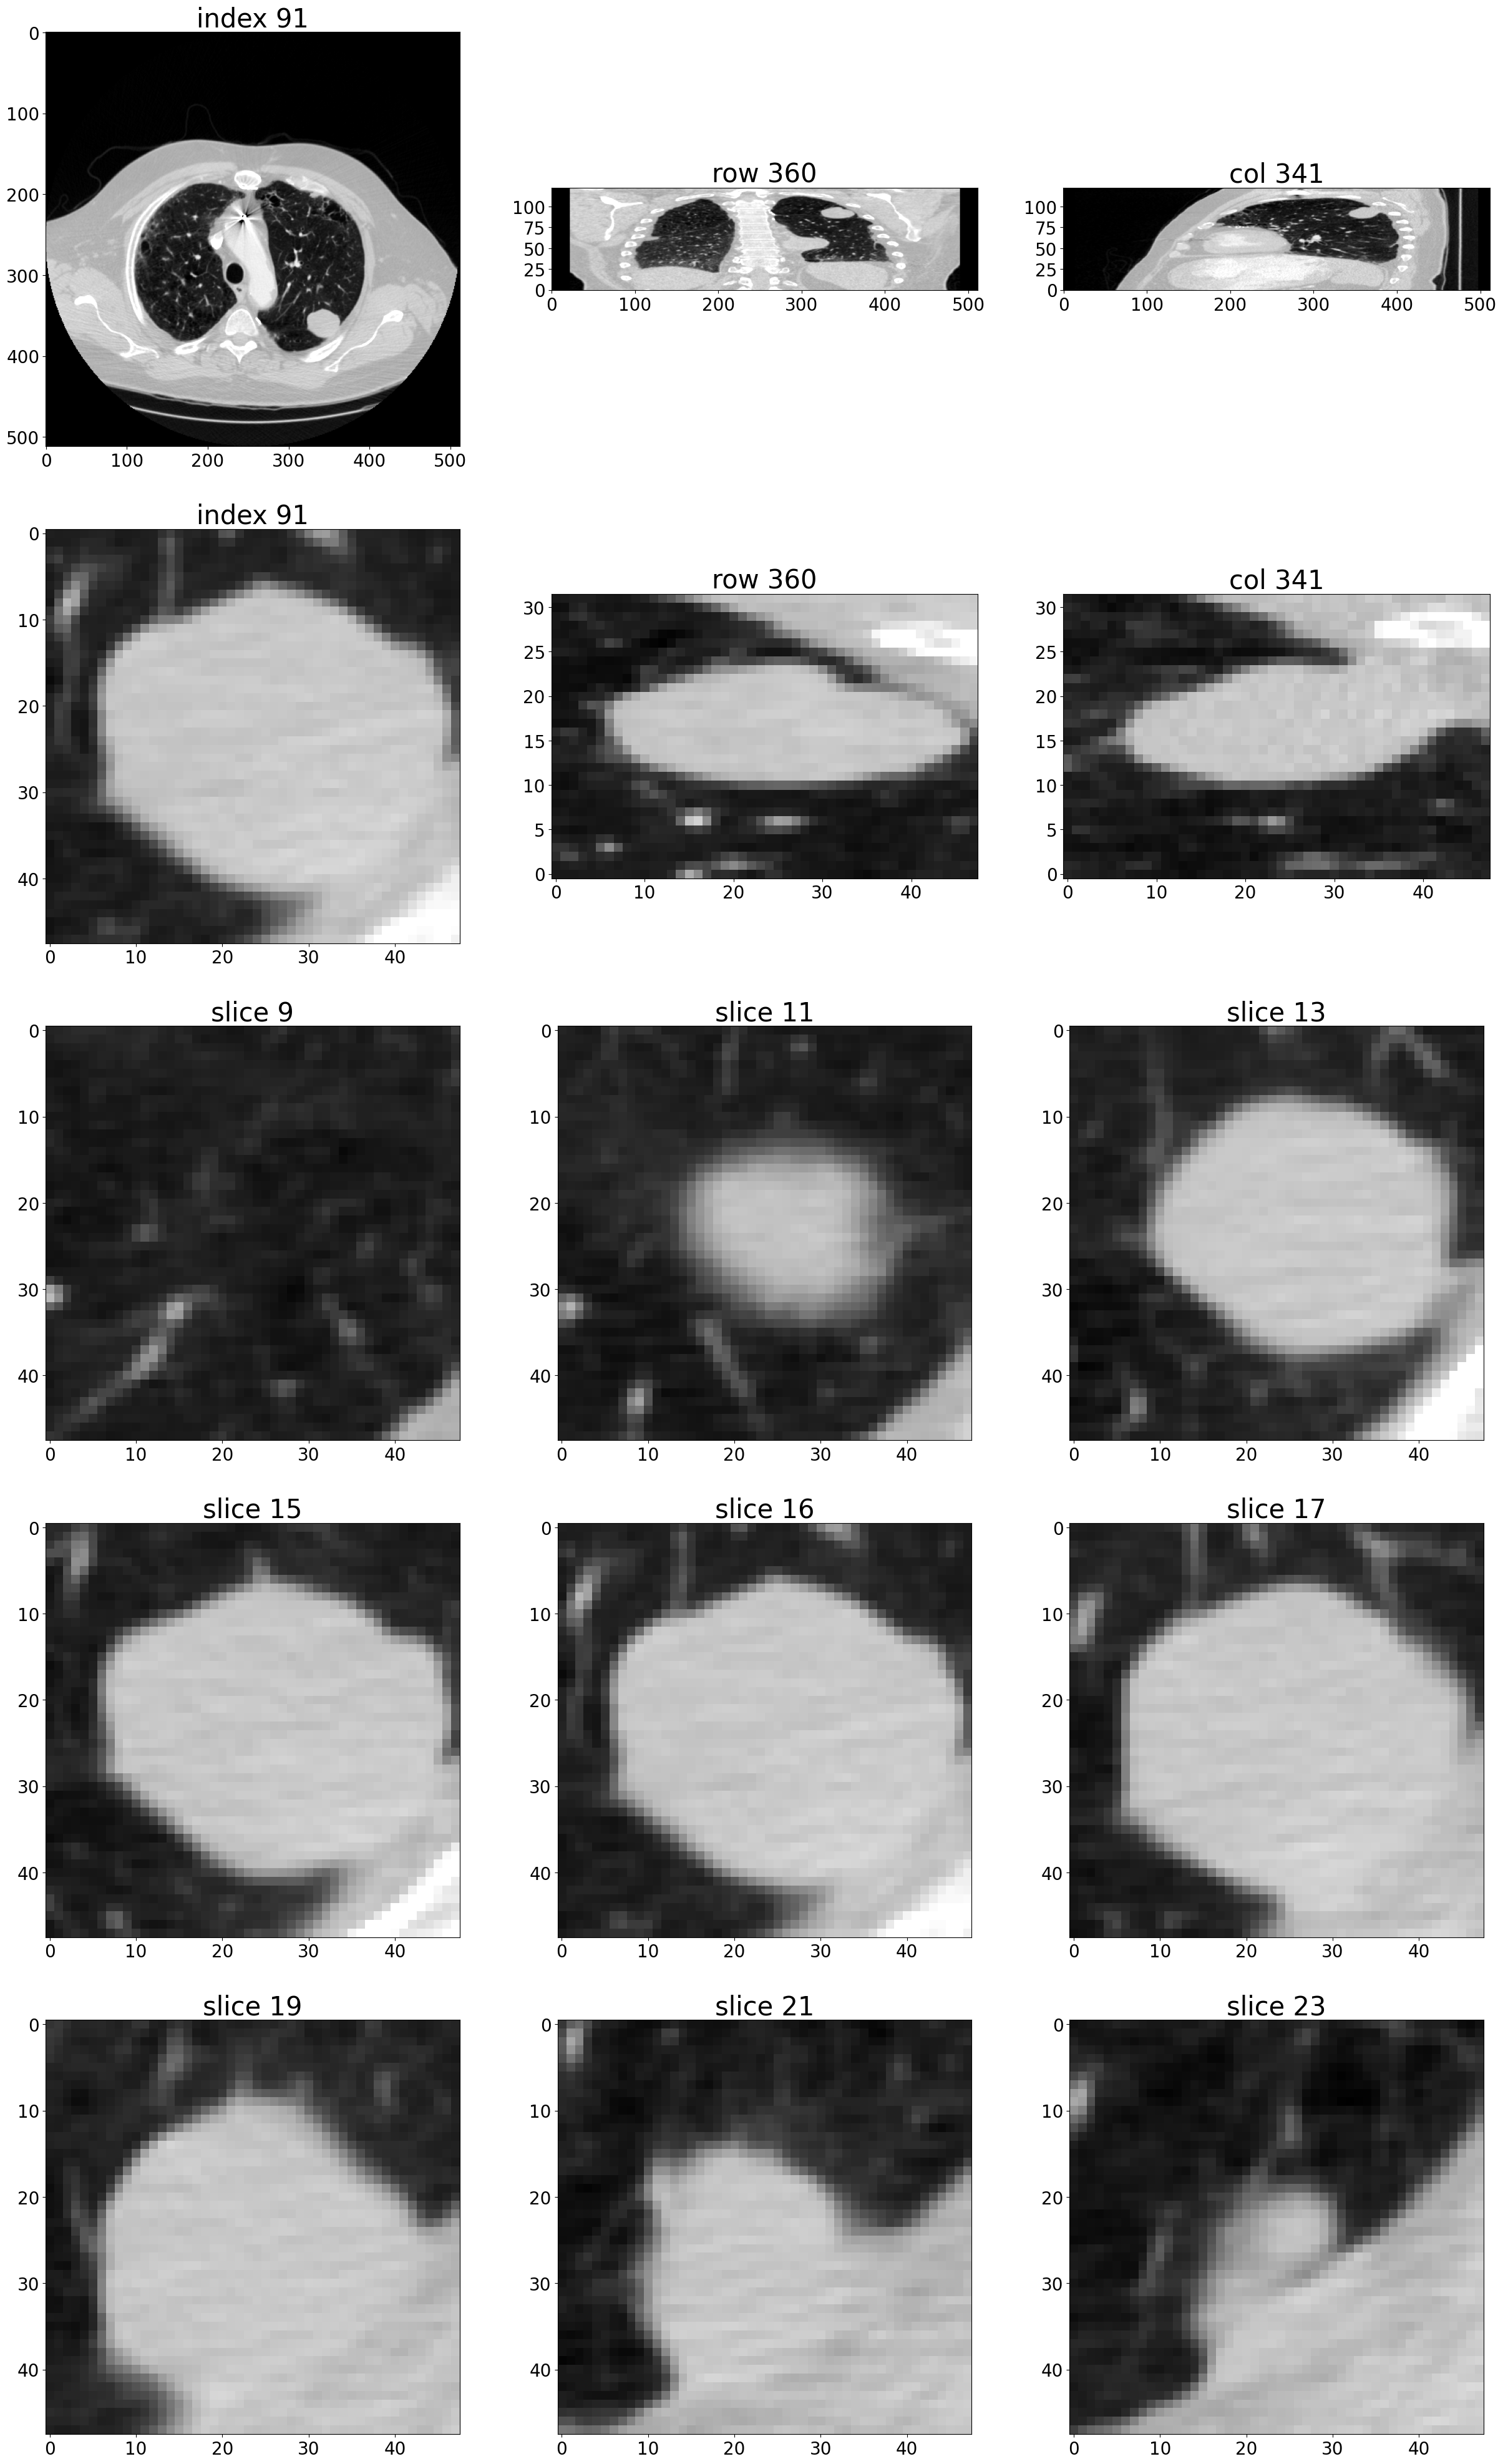

1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886 0 False [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [13]:
# %matplotlib inline
series_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886'
showCandidate(series_uid)

In [14]:
LunaDataset()[0]

2023-05-18 03:21:37,804 INFO     pid:78 p2ch10.dsets:170:__init__ <p2ch10.dsets.LunaDataset object at 0x7f4ca6b5ef40>: 551065 training samples


(tensor([[[[-732., -810., -863.,  ..., -848., -865., -890.],
           [-767., -826., -855.,  ..., -908., -896., -879.],
           [-807., -859., -848.,  ..., -898., -903., -897.],
           ...,
           [-874., -869., -839.,  ..., -159., -121., -104.],
           [-923., -930., -911.,  ..., -115., -104., -117.],
           [-898., -898., -901.,  ...,  -89.,  -93., -129.]],
 
          [[-776., -779., -860.,  ..., -852., -875., -874.],
           [-839., -834., -889.,  ..., -875., -894., -898.],
           [-861., -857., -882.,  ..., -838., -865., -889.],
           ...,
           [-862., -932., -917.,  ..., -111.,  -94., -101.],
           [-896., -918., -898.,  ...,  -16.,    1.,  -41.],
           [-875., -894., -881.,  ...,  -55.,  -47.,  -83.]],
 
          [[-854., -898., -884.,  ..., -886., -878., -857.],
           [-856., -876., -865.,  ..., -869., -880., -884.],
           [-841., -859., -881.,  ..., -857., -844., -832.],
           ...,
           [-744., -880., -873.

In [15]:
# V = np.zeros((128,128,128)) # our 3d array
# # outer box
# V[30:-30,30:-30,30:-30] = 0.75
# V[35:-35,35:-35,35:-35] = 0.0
# # inner box
# V[50:-50,50:-50,50:-50] = 0.25
# V[55:-55,55:-55,55:-55] = 0.0
# ipv.quickvolshow(V, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=1)


In [16]:
# ct = getCt(series_uid)
# ipv.quickvolshow(ct.hu_a, level=[0.25, 0.5, 0.9], opacity=0.1, level_width=0.1, data_min=-1000, data_max=1000)

# Note: the following visualization doesn't look very good.
It's only included here for completeness. 

In [17]:
def build2dLungMask(ct, mask_ndx, threshold_gcc = 0.7):
    dense_mask = ct.hu_a[mask_ndx] > threshold_gcc
    denoise_mask = scipy.ndimage.morphology.binary_closing(dense_mask, iterations=2)
    tissue_mask = scipy.ndimage.morphology.binary_opening(denoise_mask, iterations=10)
    body_mask = scipy.ndimage.morphology.binary_fill_holes(tissue_mask)
    air_mask = scipy.ndimage.morphology.binary_fill_holes(body_mask & ~tissue_mask)

    lung_mask = scipy.ndimage.morphology.binary_dilation(air_mask, iterations=2)

    return air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask


def build3dLungMask(ct):
    air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask = mask_list = \
        [np.zeros_like(ct.hu_a, dtype=np.bool) for _ in range(6)]

    for mask_ndx in range(ct.hu_a.shape[0]):
        for i, mask_ary in enumerate(build2dLungMask(ct, mask_ndx)):
            mask_list[i][mask_ndx] = mask_ary

    return air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask

In [18]:
ct = getCt(series_uid)
air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask = build3dLungMask(ct)


/tmp/ipykernel_78/181407925.py:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  [np.zeros_like(ct.hu_a, dtype=np.bool) for _ in range(6)]
/tmp/ipykernel_78/181407925.py:3: DeprecationWarning: Please use `binary_closing` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  denoise_mask = scipy.ndimage.morphology.binary_closing(dense_mask, iterations=2)
/tmp/ipykernel_78/181407925.py:4: DeprecationWarning: Please use `binary_opening` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  tissue_mask = scipy.ndimage.morphology.binary_opening(denoise_mask, iterations=10)
/tmp/ipykernel_78/18

In [19]:
# bones = ct.hu_a * (ct.hu_a > 1.5)
# lungs = ct.hu_a * air_mask
# ipv.figure()
# ipv.pylab.volshow(bones + lungs, level=[0.17, 0.17, 0.23], data_min=100, data_max=900)
# ipv.show()